#### The Model

"Nearest neighbors \[...\] quite consciously neglects a lot of information, since the prediction for each new point depends only on the handful of points closest to it."

"What’s more, nearest neighbors is probably not going to help you understand the drivers of whatever phenomenon you’re looking at."

"In the general situation, we have some data points and we have a corresponding set of labels. The labels could be True and False , indicating whether each input satisfies some condition like 'is spam?' or 'is poisonous?' or 'would be enjoyable to watch?'
Or they could be categories, like movie ratings (G, PG, PG-13, R, NC-17). Or they could be the names of presidential candidates. Or they could be favorite programming languages."

In [18]:
# Calculating distance between vectors

def vector_subtract(v, w):
    """
    subtracts corresponding elements
    """
    return [v_i - w_i for v_i, w_i in zip(v, w)]

def dot(v, w):
    """
    v_1 * w_1 + ... + v_n * w_n
    """
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    """
    v_1 * v_1 + ... + v_n * v_n"
    """
    return dot(v, v)

def squared_distance(v, w):
    """
    (v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2
    """
    return sum_of_squares(vector_subtract(v, w))

def distance(v, w):
    return math.sqrt(squared_distance(v, w))

"In our case, the data points will be vectors, which means that we can use the *distance* function."

* "Let’s say we’ve picked a number k like 3 or 5. Then when we want to classify some new data point, we find the k nearest labeled points and let them vote on the new output."

In [4]:
from collections import Counter

def raw_majority_vote(labels):
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner

# Doesn't solve ties!

In case of tie:
* "Pick one of the winners at random;
* Weight the votes by distance and pick the weighted winner;
* Reduce k until we find a unique winner."

In [6]:
# Implementing the third
def majority_vote(labels):
    """
    assumes that labels are ordered from nearest to farthest
    """
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count for count in vote_counts.values()
                       if count == winner_count])
    if num_winners == 1:
        return winner # unique winner, so return it
    else:
        return majority_vote(labels[:-1])
        # try again without the farthest

In [13]:
def knn_classify(k, labeled_points, new_point):
    """
    each labeled point should be a pair (point, label)
    """
    # order the labeled points from nearest to farthest
    by_distance = sorted(labeled_points,
                         key=lambda point,_: distance(point,new_p))
    # find the labels for the k closest
    k_nearest_labels = [label for _, label in by_distance[:k]]
    # and let them vote
    return majority_vote(k_nearest_labels)

#### The Curse of Dimensionality

"k-nearest neighbors runs into trouble in higher dimensions thanks to the 'curse of dimensionality', which boils down to the fact that high-dimensional spaces are vast. Points in high-dimensional spaces tend not to be close to one another at all."

In [14]:
def random_point(dim):
    return [random.random() for _ in range(dim)]

def random_distances(dim, num_pairs):
    return [distance(random_point(dim), random_point(dim)) 
            for _ in range(num_pairs)]

In [20]:
import math
import random

dimensions = range(1, 101)

avg_distances = []
min_distances = []
random.seed(0)

for dim in dimensions:
    distances = random_distances(dim, 10000)
    avg_distances.append(sum(distances)/len(distances))
    min_distances.append(min(distances))

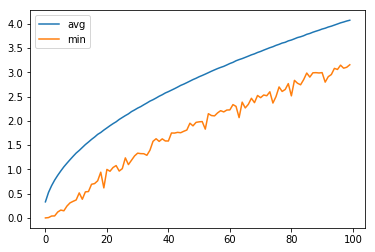

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(avg_distances,label='avg')
plt.plot(min_distances,label='min')
_ = plt.legend()

In [24]:
min_avg_ratio = [min_dist / avg_dist 
                 for min_dist, avg_dist
                 in zip(min_distances, avg_distances)]

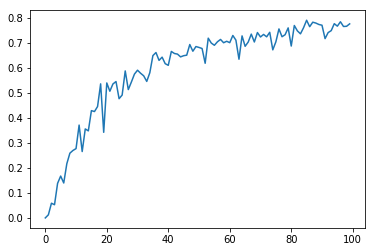

In [25]:
plt.plot(min_avg_ratio)

"**scikit-learn** has many nearest neighbor models."